# STA 141B Lecture 7

The class website is <https://github.com/2019-winter-ucdavis-sta141b/notes>

### Announcements

* Link for project repos was posted last week

### Topics

* Web APIs
* The __requests__ package

### Data Sets

* [Star Wars API](https://swapi.co/documentation)
* [iTunes Search API](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/)


### References

* [__requests__ documentation](http://docs.python-requests.org/en/master/)
* Python for Data Analysis, Ch. 6

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/

## Update Pandas to 0.24.0

* Windows: in Anaconda Prompt, run `conda update pandas`
* MacOS: in Terminal, run `conda update pandas`
* Linux (or people without Anaconda): in shell, run `pip install --upgrade pandas`

More info about what's new [here](http://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.24.0.html).

## Setting with Copy

When you use Pandas, you might see a `SettingWithCopyError`.

In [2]:
import pandas as pd

df = pd.DataFrame({"x": [0, 1, 2], "y": ["A", "B", "C"]})
df

,x,y
0,0,A
1,1,B
2,2,C


In [4]:
x = df["x"]
x

0    0
1    1
2    2
Name: x, dtype: int64

In [5]:
x[0] = 1

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


The error means that you've indexed a data frame in a way that might make a copy, and then assigned something to that copy. Pandas sometimes makes copies and sometimes makes references -- there is no guarantee!

Two different ways to make sure your code does what you want:
* Assign the modified copy back into the original data. This doesn't get rid of the warning, but ensures your code does what you meant.
* Assign directly into the original, by using `.loc` or `.iloc`. This does get rid of the warning.

In [6]:
# Assign modified copy
df["x"] = x

,x,y
0,1,A
1,1,B
2,2,C


In [ ]:
# Assign with .loc[] instead
df.loc[0, "x"] = 1 # No warning!

## Example Questions

1. Which Star Wars movie has the most planets in it? What are the names of the planets in each movie?
2. Can we estimate how many remixes there are of PSY's Gangnam Style?

## Getting Data from the Web

Three ways you can get data from the web, from most to least convenient:

1. Direct download or "data dump"
2. API
3. Scraping

Always look for a direct download first!

## Web APIs

An _application programming interface_ (API) is a collection of functions and data structures for communicating with other software. For instance, whenever you use a Python package, you're using the API created by the package's developers.

Websites sometimes provide an API so that programmers can access content without web scraping.

So how can we call a function in a web API?

### Hypertext Transfer Protocol

The hypertext transfer protocol (HTTP) is a set of rules for communicating over the internet.

For example, your web browser uses HTTP every time you visit a web page. The browser makes a _request_ to the server for the page, and if nothing goes wrong, the server _responds_ with the page. If you have Firefox or Chrome, you can inspect these requests with your browser's web developer tools (`Ctrl-I`).

Several [different kinds of HTTP requests](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) are possible. Think of these as the different "verbs" you can use when communicating in HTTP.

Many protocols exist for communicating over the internet. For instance, you may have heard of _file transfer protocol_ (FTP) for transferring files, or _simple mail transfer protocol_ (SMTP) for sending/receiving email. However, web APIs almost always use HTTP.

### Representational State Transfer

The most popular kind of web API is a _representational state transfer_ (REST) API. In a REST API:
   
* Each function has a different URL, sometimes called an _endpoint_.
* The server handles separate function calls independently of each other.

We can use the [Star Wars API](https://swapi.co/) to answer our first example question. One of the endpoints in the Star Wars API is `https://swapi.co/api/`. This endpoint returns a list of all other endpoints in the API.

When you first use a web API, check the documentation to find out what the endpoints are and what kind of HTTP requests to use. If the documentation doesn't mention what kind of HTTP request to use, then GET is usually the right choice.

### Making Requests

Python's __requests__ package provides functions for making HTTP requests and is [well-documented](http://docs.python-requests.org/en/master/).

Let's use the endpoint we learned from the Star Wars API.

In [7]:
import requests

In [24]:
response = requests.get("https://swapi.co/api/")
response

<Response [200]>

A response to an HTTP request always includes a status code that summarizes whether the request was successful. Wikipedia has a full [list of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Generally,

* 200-299: Your request succeeded.
* 300-399: You need to take further action to complete the request.
* 400-499: Your request wasn't valid (you made a mistake). You've probably seen 404 before!
* 500-599: Your request failed (the server made a mistake).

You can have __requests__ check the status for you with the `.raise_for_status()` method:

In [14]:
response.raise_for_status()

Once you have the response, now what? Where's the data?

Different web APIs use different formats. Again, see the documentation. Two common formats are:

* _JavaScript Object Notation_ (JSON): JSON looks and works a lot like Python lists and dictionaries. Lists are surrounded with `[ ]`, and dictionaries are surrounded with `{ }`. There are many Python libraries for reading JSON into lists and dictionaries. Jupyter notebooks are an example of a file in JSON format.

* _eXtensible Markup Language_ (XML): XML uses "tags" denoted by `< >` to mark up sections of text. We'll learn more about XML when we learn about web scraping, since XML is very similar to hypertext markup language (HTML), the language used to build web pages.

The Star Wars API returns data in JSON format.

We can inspect the raw content (bytes) of a response with the `.content` attribute. If we know the response is in a text format, we can use `.text` to see the content as an ordinary Python string.

In [16]:
response.text

'{"people":"https://swapi.co/api/people/","planets":"https://swapi.co/api/planets/","films":"https://swapi.co/api/films/","species":"https://swapi.co/api/species/","vehicles":"https://swapi.co/api/vehicles/","starships":"https://swapi.co/api/starships/"}'

Since the response we got is in JSON format, we'd like to convert the string to lists and dictionaries. The __requests__ package provides a method `.json()` to do this.

In [19]:
result = response.json()
result

{'people': 'https://swapi.co/api/people/',
 'planets': 'https://swapi.co/api/planets/',
 'films': 'https://swapi.co/api/films/',
 'species': 'https://swapi.co/api/species/',
 'vehicles': 'https://swapi.co/api/vehicles/',
 'starships': 'https://swapi.co/api/starships/'}

In [20]:
result["films"]

'https://swapi.co/api/films/'

### Being Polite

Making an HTTP request is not free! It has a real cost in CPU time and also cash. Server administrators will not appreciate it if you make too many requests or make requests too quickly. So:

* Use `time.sleep()` to slow down any requests you make in a loop. Aim for no more than 20-30 requests per second.
* Install and use the __requests_cache__ package to avoid downloading extra data when you make the same request twice.

Failing to be polite can get you banned from websites!

In [23]:
import requests_cache # conda install -c conda-forge requests-cache

requests_cache.install_cache("my_cache")

### Answering Example Question 1

In [85]:
response = requests.get('https://swapi.co/api/films/')
response.raise_for_status()
result = response.json()
result

{'count': 7,
 'next': None,
 'previous': None,
 'results': [{'title': 'A New Hope',
   'episode_id': 4,
   'opening_crawl': "It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....",
   'director': 'George Lucas',
   'producer': 'Gary Kurtz, Rick McCallum',
   'release_date': '1977-05-25',
   'characters': ['https://swapi.co/api/people/1/',
    'https://swapi.co/api/people/2/',
    'https://swapi.co/api/people/3/',
    'https://swapi.co/api/people/4/',
    'https://swapi.co/api/people/5/'

In [78]:
result.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [79]:
result["next"]

In [86]:
import pandas as pd

result_df = pd.DataFrame(result["results"])

In [87]:
result_df.columns

Index(['characters', 'created', 'director', 'edited', 'episode_id',
       'opening_crawl', 'planets', 'producer', 'release_date', 'species',
       'starships', 'title', 'url', 'vehicles'],
      dtype='object')

In [88]:
result_df = result_df[["planets", "title"]]

result_df = result_df.set_index("title")

# Turn the last column remaining into a series
result_s = result_df.squeeze()
result_df

,planets
title,
A New Hope,"[https://swapi.co/api/planets/2/, https://swap..."
Attack of the Clones,"[https://swapi.co/api/planets/8/, https://swap..."
The Phantom Menace,"[https://swapi.co/api/planets/8/, https://swap..."
Revenge of the Sith,"[https://swapi.co/api/planets/2/, https://swap..."
Return of the Jedi,"[https://swapi.co/api/planets/5/, https://swap..."
The Empire Strikes Back,"[https://swapi.co/api/planets/4/, https://swap..."
The Force Awakens,[https://swapi.co/api/planets/61/]


In [89]:
# Could also do this with a list comprehension
result_s.apply(len)

title
A New Hope                  3
Attack of the Clones        5
The Phantom Menace          3
Revenge of the Sith        13
Return of the Jedi          5
The Empire Strikes Back     4
The Force Awakens           1
Name: planets, dtype: int64

In [49]:
%matplotlib inline

[Text(0, 0, 'A New Hope'),
 Text(0, 0, 'Attack of the Clones'),
 Text(0, 0, 'The Phantom Menace'),
 Text(0, 0, 'Revenge of the Sith'),
 Text(0, 0, 'Return of the Jedi'),
 Text(0, 0, 'The Empire Strikes Back'),
 Text(0, 0, 'The Force Awakens')]

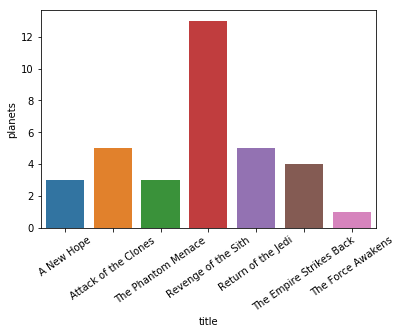

In [92]:
import seaborn as sns

result_plot = result_s.apply(len).reset_index()
ax = sns.barplot(x = "title", y = "planets", data = result_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
# Could also set `ha = "right"` to make labels line up with ticks

In [62]:
response = requests.get('https://swapi.co/api/films/')
response.raise_for_status()
result = response.json()
result = pd.DataFrame(result["results"])
result = result[["title", "planets"]].set_index("title").squeeze()

In [63]:
result

title
A New Hope                 [https://swapi.co/api/planets/2/, https://swap...
Attack of the Clones       [https://swapi.co/api/planets/8/, https://swap...
The Phantom Menace         [https://swapi.co/api/planets/8/, https://swap...
Revenge of the Sith        [https://swapi.co/api/planets/2/, https://swap...
Return of the Jedi         [https://swapi.co/api/planets/5/, https://swap...
The Empire Strikes Back    [https://swapi.co/api/planets/4/, https://swap...
The Force Awakens                         [https://swapi.co/api/planets/61/]
Name: planets, dtype: object

In [73]:
# We need to .apply() a function to each element to get the list of planet names
import time

# We need to write the function that gets the planet names for one element
# planets_ep = result[0]
# planets_ep

def get_planets(planets_ep):
    planets = []
    for e in planets_ep:
        # You can use %timeit to time code in Jupyter notebooks
        #e = planets_ep[0]
        response = requests.get(e)
        response.raise_for_status()
        planets.append(response.json()["name"])
        time.sleep(0.1) # aim not to make more than 20-30 requests / sec
    
    return planets
    
get_planets(result[0])

['Alderaan', 'Yavin IV', 'Tatooine']

In [74]:
result.apply(get_planets)

title
A New Hope                                    [Alderaan, Yavin IV, Tatooine]
Attack of the Clones          [Naboo, Coruscant, Kamino, Geonosis, Tatooine]
The Phantom Menace                              [Naboo, Coruscant, Tatooine]
Revenge of the Sith        [Alderaan, Dagobah, Naboo, Coruscant, Utapau, ...
Return of the Jedi              [Dagobah, Endor, Naboo, Coruscant, Tatooine]
The Empire Strikes Back                 [Hoth, Dagobah, Bespin, Ord Mantell]
The Force Awakens                                                    [Jakku]
Name: planets, dtype: object

### Query Strings

Most of the functions we use have parameters, and you can pass arguments for those parameters when you call a function.

Endpoints in REST APIs work the same way, but the syntax is different. You can pass arguments by adding `?PARAMETER=ARGUMENT` to the end of the URL. Parameter and argument pairs are separated by `&`. This syntax is called a _query string_.

For instance, Apple provides a web API for the iTunes store, with [documentation](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/). We can use this to try to answer our second example question.

The search endpoint is `https://itunes.apple.com/search`, and the documentation lists several parameters. We can use __requests__ to build the query string automatically.

In [75]:
response = requests.get("https://itunes.apple.com/search", params = {
        "term": "Gangnam Style",
        "country": "US"
    })
response.raise_for_status()

Every response has a `.url` attribute that shows the URL used for the request.

In [76]:
response.url

'https://itunes.apple.com/search?country=US&term=Gangnam+Style'